# Santos Buoy - Quality Control Analysis

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
data_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'
os.chdir(data_path)

In [3]:
# DATA RAW
buoys_df_raw = pd.read_csv('pnboia_raw_data.csv',parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.rename(columns={'humi':'rh', # variables temporarily renamed to match QCChecks limits naming
                            'dewp':'dewpt',
                            'wtmp':'sst',
                            'cvel1':'cspd1',
                            'cvel2':'cspd2',
                            'cvel3':'cspd3',
                            'wvht':'swvht',
                            'wmax':'mxwvht',
                            'dpd':'tp',
                            'mwd':'wvdir',
                            'spred':'wvspread',
                            'arad':'srad'}, inplace=True)
buoys_df_raw.drop(columns=['lat','lon'],inplace=True)

names = {'cf':'cabofrio',
        'cf2':'cabofrio2',
        'fo':'fortaleza',
        'it':'itajai_0',
        'ni':'niteroi',
        'po':'porto_seguro', 
        're':'recife',
        'rg':'rio_grande', 
        'sa':'santos', 
        'vi':'vitoria'}


buoys_df_raw['buoy'] = buoys_df_raw['buoy'].replace(names)
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# Limits from pnboia_limits_tests.py
santos_lims = pnboia_limits_tests.santos

# santos data
santos_raw = buoys_df_raw.loc['santos']


# DATA SITE
buoys_df_site = pd.read_csv('pnboia_site_data.csv',parse_dates=['Datetime'],index_col=['buoy','Datetime'])
buoys_df_site.sort_index(inplace=True)

# Get buoys names
buoys_site = buoys_df_site.reset_index().loc[:,'buoy'].unique()

params_rename = {
                    'Cvel1':'cspd1',
                    'Cvel2':'cspd1',
                    'Cvel3':'cspd1',
                    'Dewp':'dewpt',
                    'Dpd':'tp',
                    'Gust':'gust',
                    'Humi':'rh',
                    'Pres':'pres',
                    'Pressao_Atm':'pres',
                    'Rad_Solar':'arad',
                    'Salinidade':'sss',
                    'Temp_Agua':'sst',
                    'Temp_Ar':'atmp',
                    'Umidade':'rh',
                    'Velocidade_Vento':'wspd',
                    'Wmax':'mxwvht',
                    'Wspd':'wspd1',
                    'Wtmp':'sst',
                    'Wvht':'swvht',
                    'dpd':'tp',
                    'wvht':'swvht',
                    'Direcao_Vento':'wdir',
                    'Wdir':'wdir1',
                    'Atmp':'atmp'
                 }

buoys_df_site.rename(columns=params_rename,inplace=True)

## Preliminary Filtering

- Check range limits for "srad"

In [4]:
# filter data with
santos = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    outlier_check=False,
                    t_continuity_check=False)

santos = santos.where(santos['srad'] > -1000)

mis_value_check done.
range_check done.


## Statistical Analysis

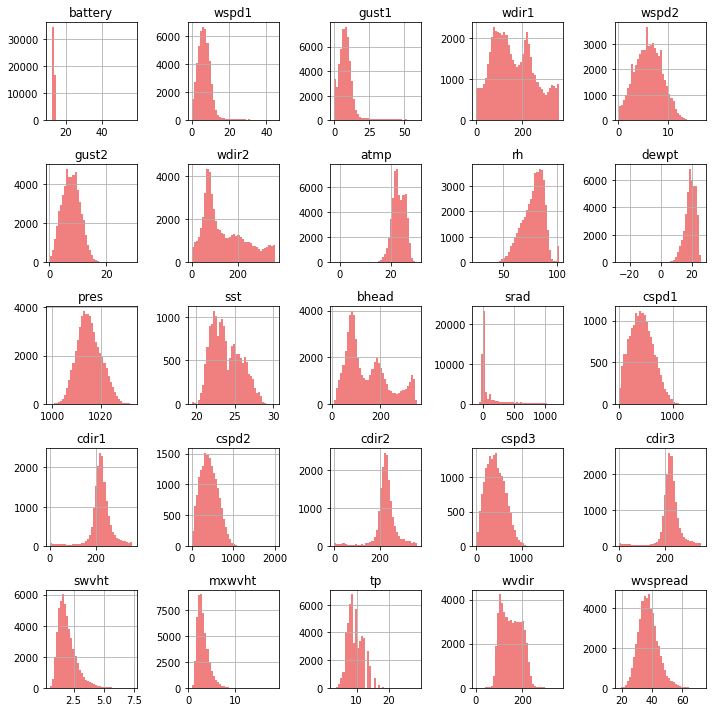

In [82]:
santos.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

In [5]:
no_outliers = ['pres','wspd2', 'swvht', 'wvspread']
few_outliers = ['gust2', 'atmp', 'rh', 'dewpt', 'sst', 'cspd1', 'mxwvht']
many_outliers = ['wspd1', 'gust1', 'srad']

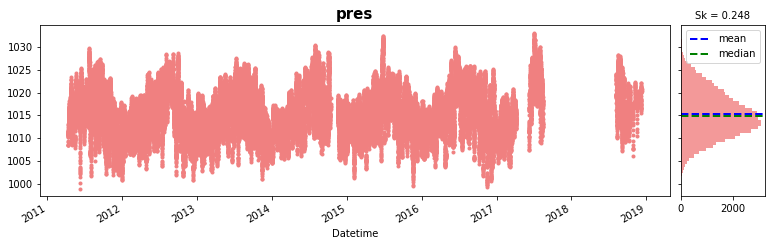

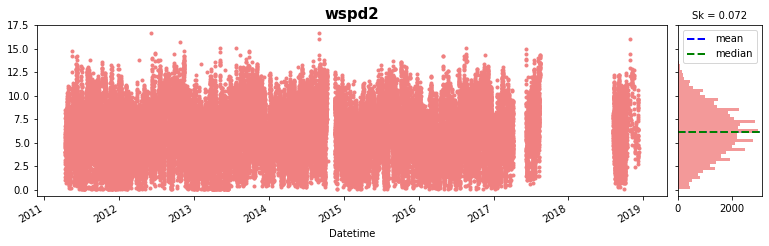

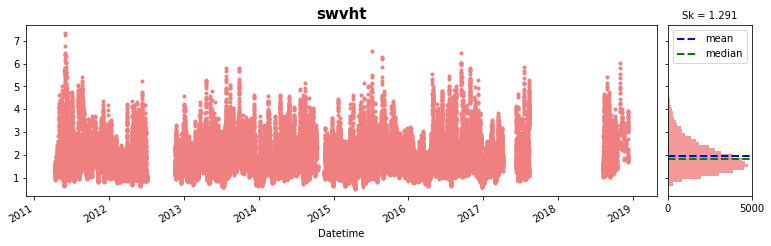

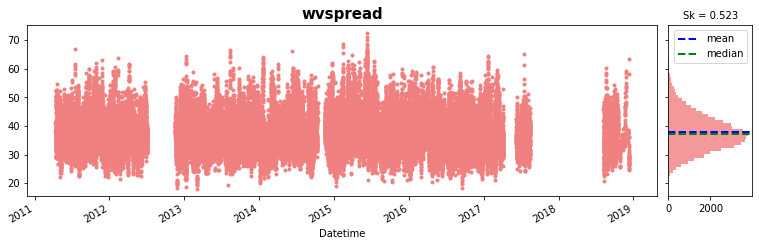

In [124]:
# NO OUTLIERS
for param in no_outliers:
    plot_hist(santos,param)

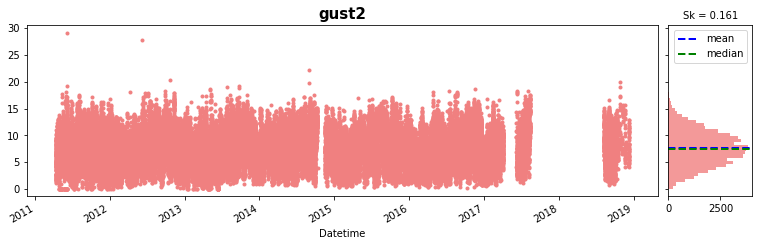

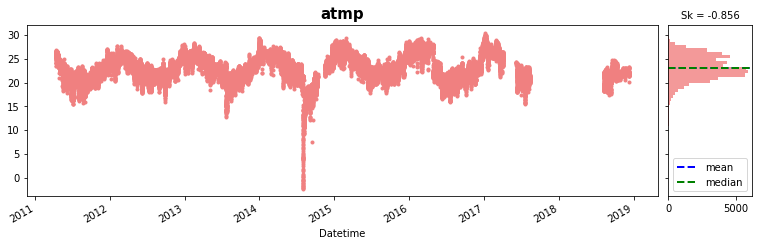

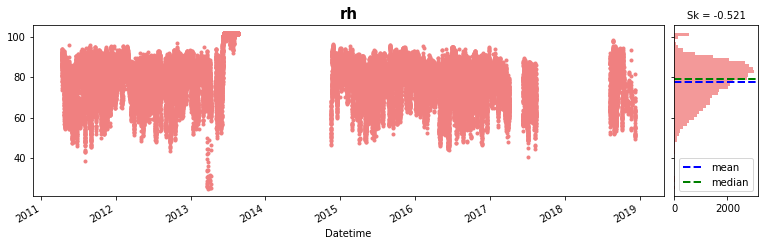

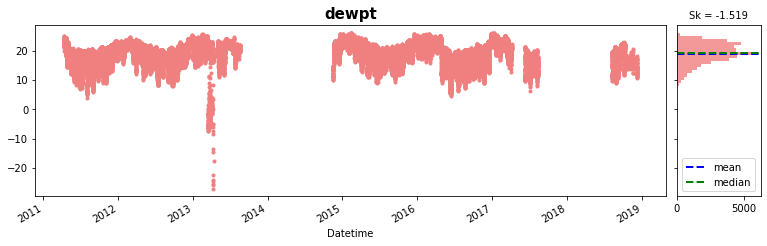

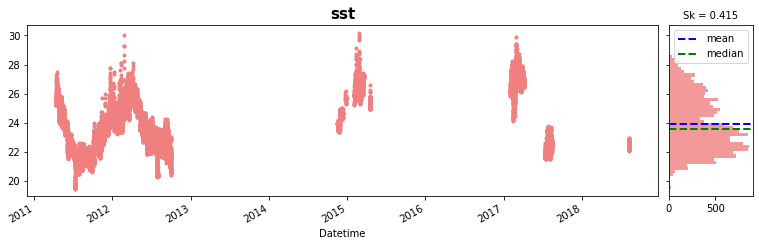

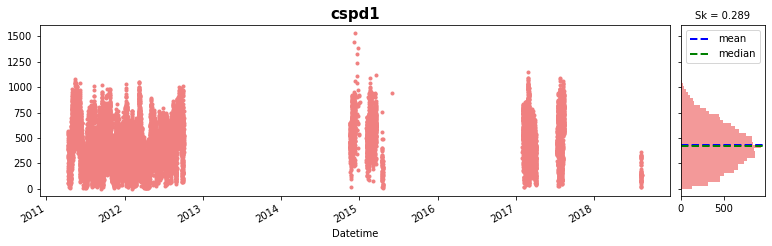

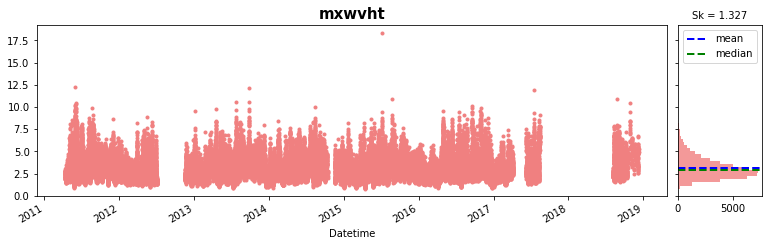

In [125]:
# FEW OUTLIERS
for param in few_outliers:
    plot_hist(santos,param)

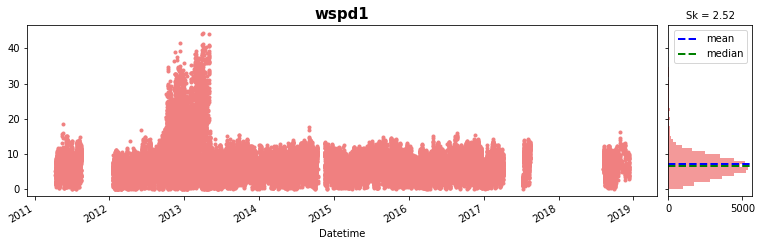

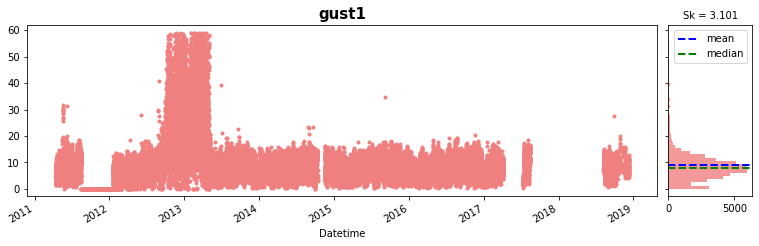

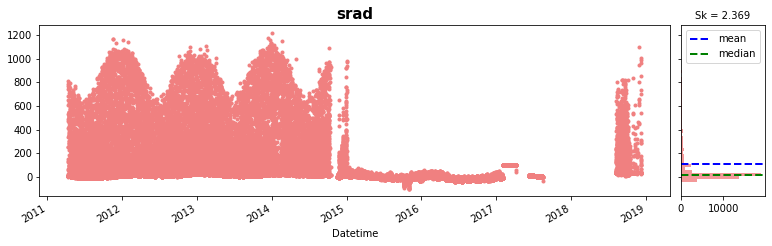

In [126]:
# MANY OUTLIERS
for param in many_outliers:
    plot_hist(santos,param)

## Limits generation and data filtering

In [6]:
# Generated lims
santos_out_lims_df_1 = gen_outlier_lim(santos,buoy_name='santos',std_factor=3).round(1)

# Generate lims dict
santos_out_lims_dict_1 = manual_outlier_lims('santos',santos_out_lims_df_1)

# filter data with
santos1 = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=santos_out_lims_dict_1)

range_check_climate done.


In [7]:
# Generated lims
santos_out_lims_df_2 = gen_outlier_lim(santos,buoy_name='santos',std_factor=5).round(1)

# Generate lims dict
santos_out_lims_dict_2 = manual_outlier_lims('santos',santos_out_lims_df_2)

# filter data with
santos2 = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=santos_out_lims_dict_2)

range_check_climate done.


In [8]:
santos_out_lims_df_1

,mean,std,lower_lim,upper_lim
param,,,,
wspd1,7.0,4.4,0.0,20.2
gust1,9.2,7.8,0.0,32.6
wdir1,162.5,90.2,0.0,433.2
wspd2,6.1,2.7,0.0,14.2
gust2,7.6,3.2,0.0,17.1
wdir2,141.4,92.6,0.0,419.1
atmp,23.1,2.6,15.3,30.9
rh,77.7,10.2,47.1,108.2
dewpt,19.0,3.9,7.3,30.6


In [9]:
santos_out_lims_df_2

,mean,std,lower_lim,upper_lim
param,,,,
wspd1,7.0,4.4,0.0,28.9
gust1,9.2,7.8,0.0,48.2
wdir1,162.5,90.2,0.0,613.7
wspd2,6.1,2.7,0.0,19.5
gust2,7.6,3.2,0.0,23.4
wdir2,141.4,92.6,0.0,604.2
atmp,23.1,2.6,10.0,36.1
rh,77.7,10.2,26.8,128.5
dewpt,19.0,3.9,0.0,38.3


# Testing generated limits

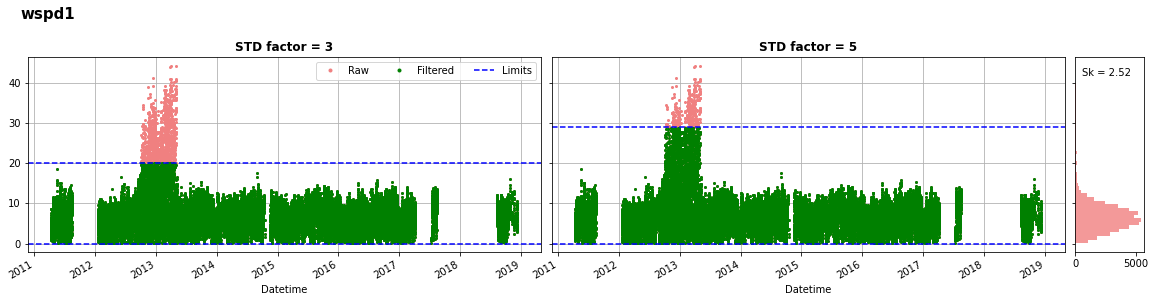

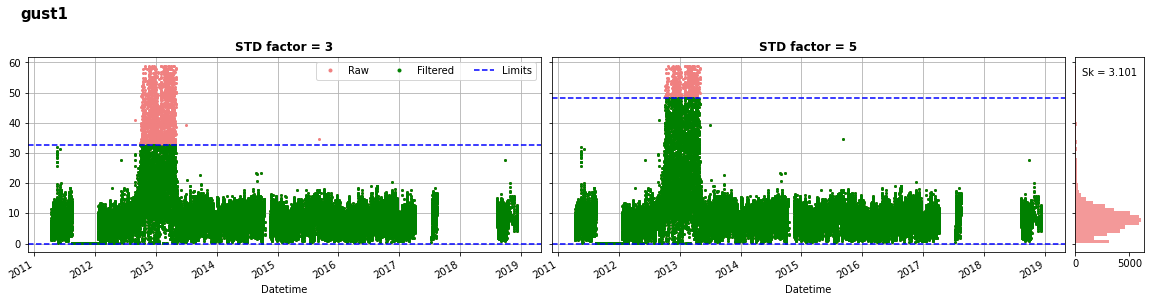

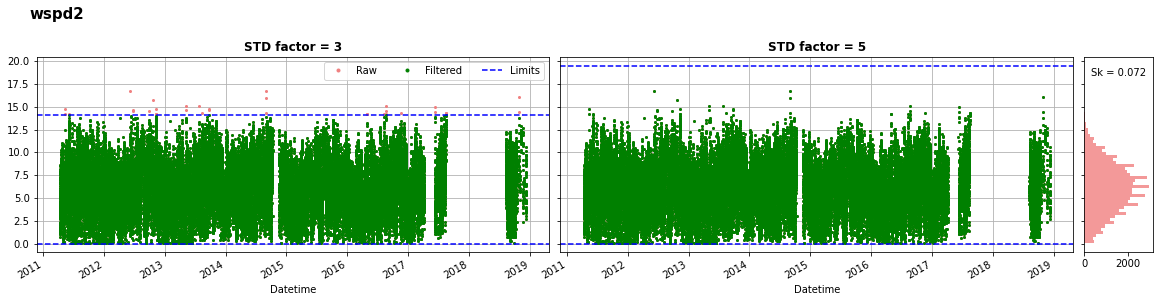

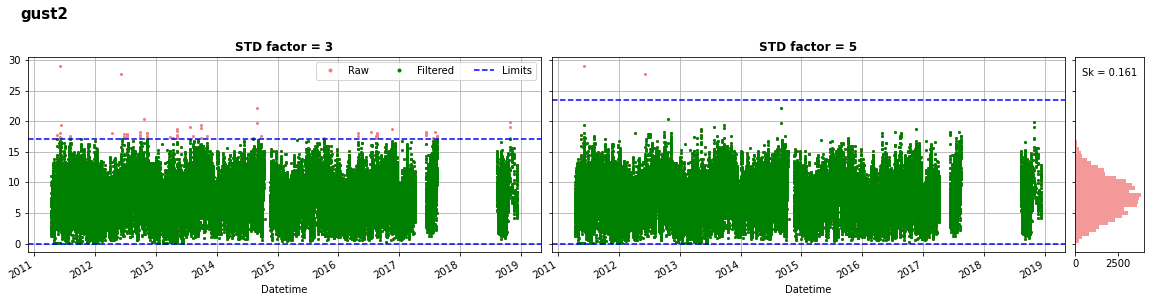

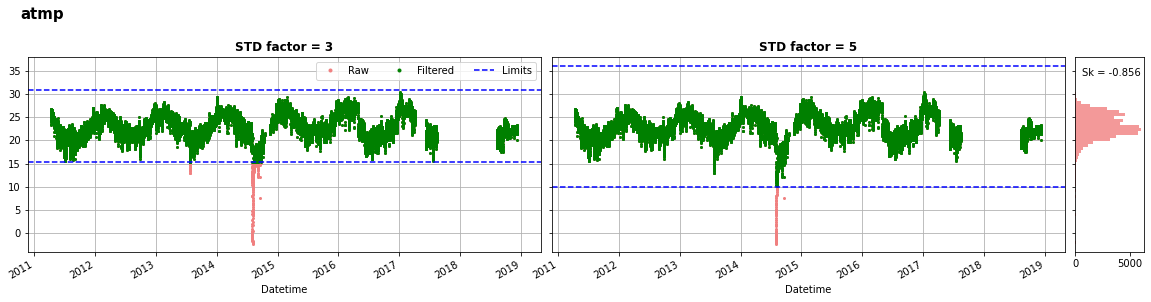

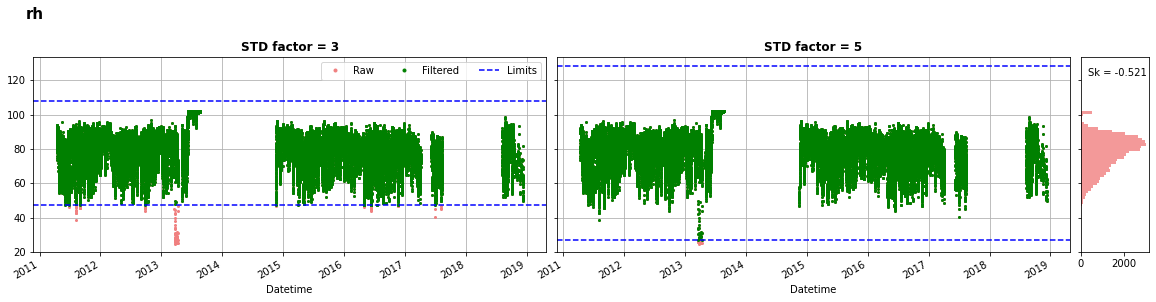

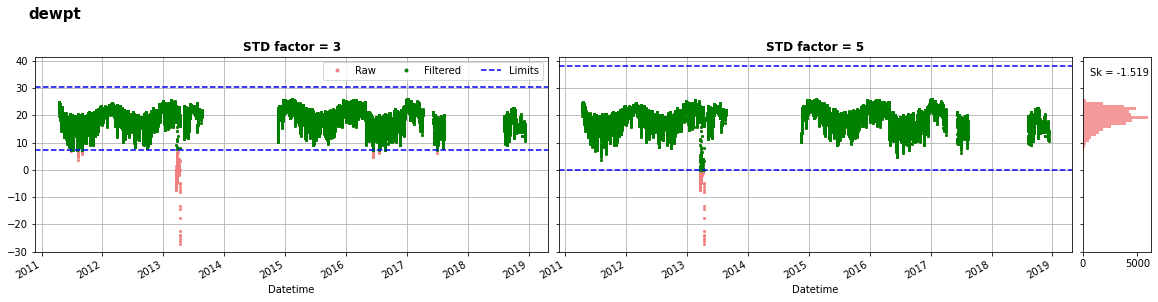

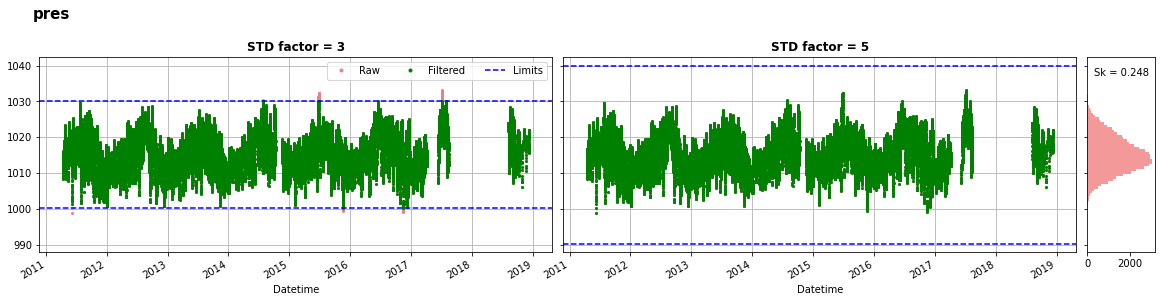

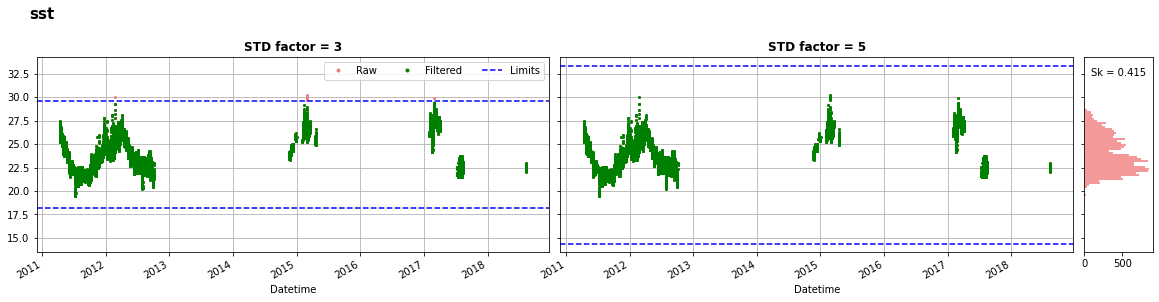

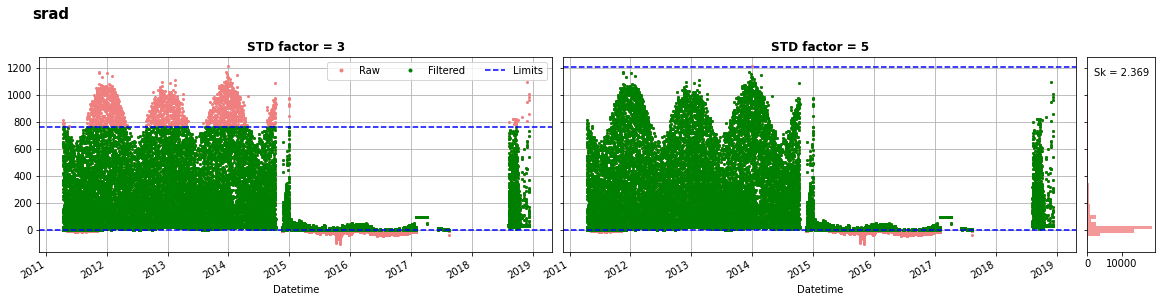

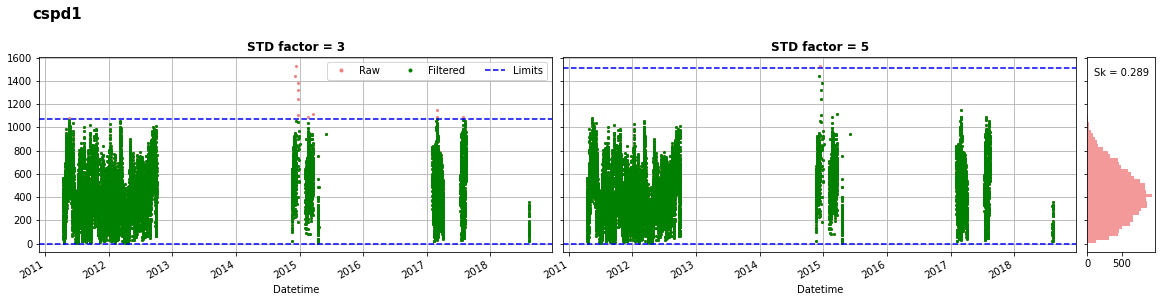

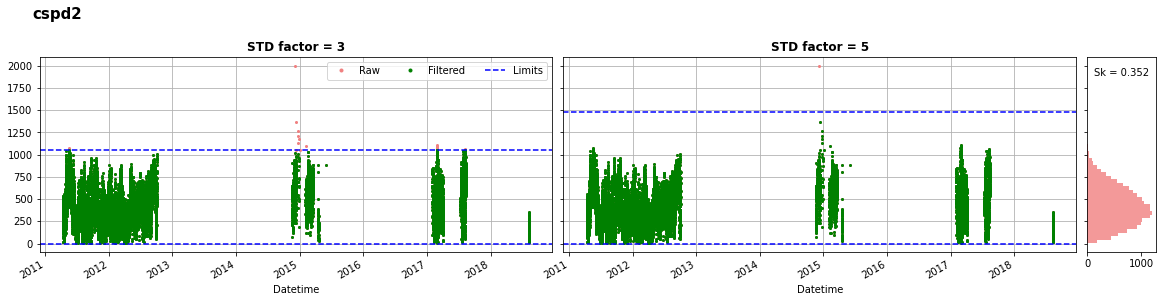

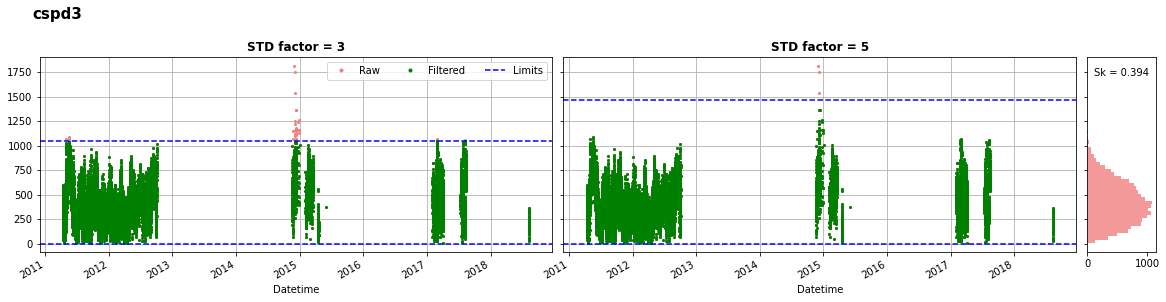

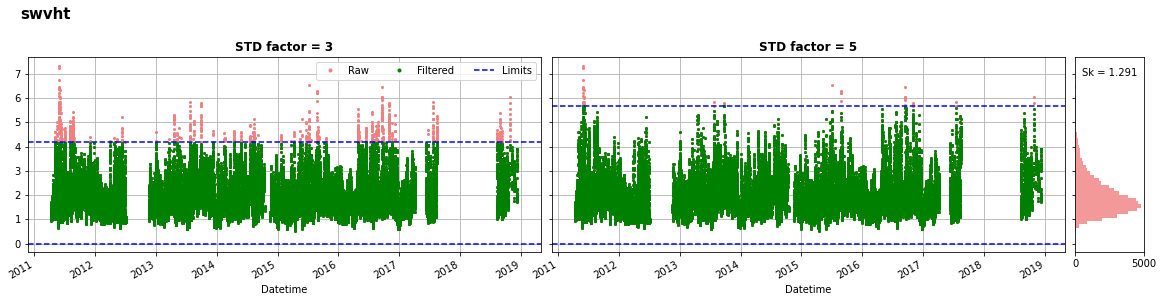

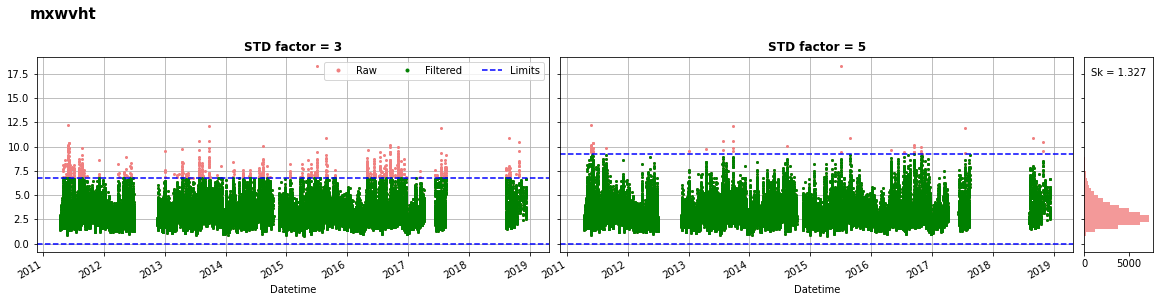

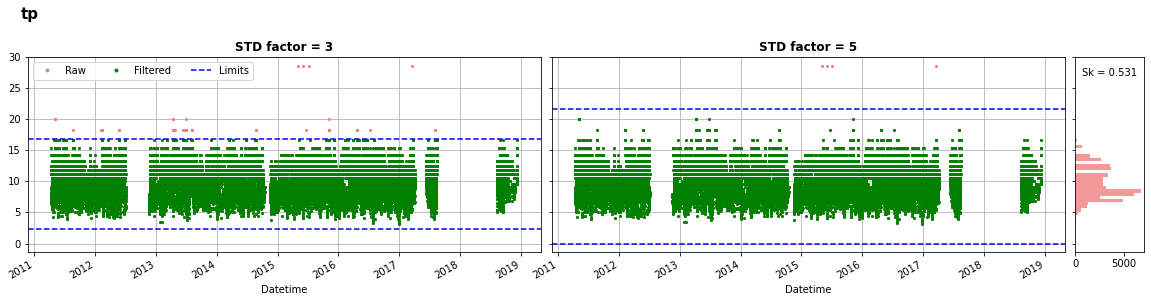

In [10]:
santos_notdir = santos.drop(columns=santos.filter(regex='dir|head|spread').columns)
parameters = santos_notdir.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=santos,
                    limits=santos_lims,
                    buoy='santos',
                    parameter=param)
    plt.show()

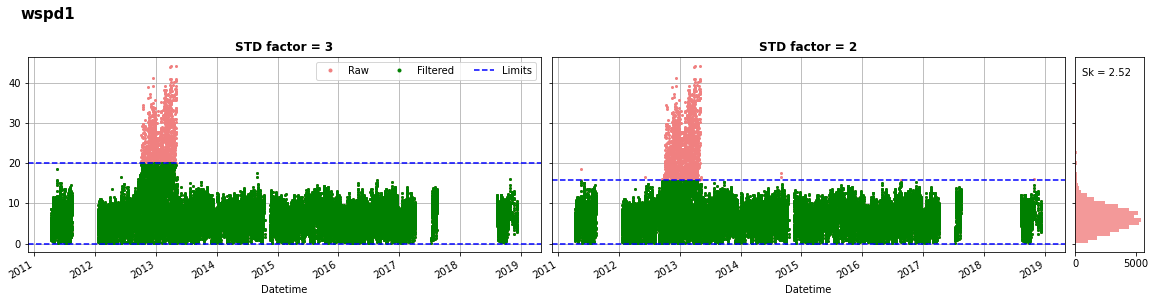

In [59]:
param = 'wspd1'
plot_comparison(factor1=3, 
                    factor2=2, 
                    data=santos,
                    limits=santos_lims,
                    buoy='santos',
                    parameter=param)
plt.show()

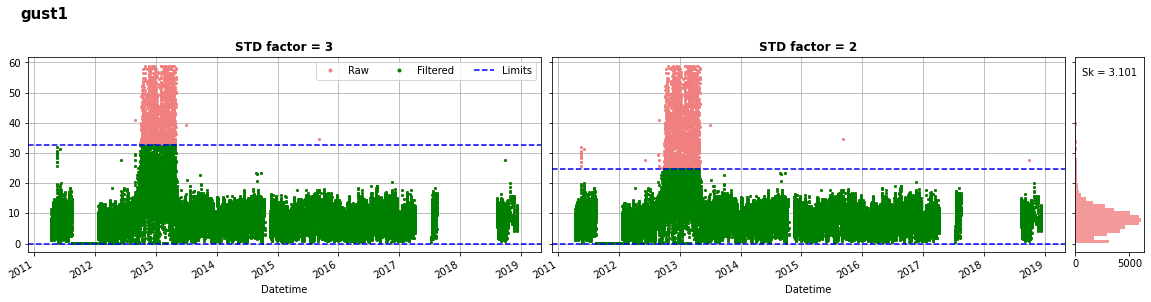

In [18]:
param = 'gust1'
plot_comparison(factor1=3, 
                    factor2=2, 
                    data=santos,
                    limits=santos_lims,
                    buoy='santos',
                    parameter=param)
plt.show()

## BMO Santos filtering with Santos limits

### Load data

In [69]:
# bmo santos data
bmosantos_raw = buoys_df_site.loc['bmo_santos'].dropna(how='all', axis=1)
bmosantos_raw.rename(columns={'arad':'srad', 'compass':'bhead'}, inplace=True)
bmosantos_raw.drop(columns=['lat','lon','Battery'], inplace=True)

# Limits from pnboia_limits_tests.py
bmosantos_lims = pnboia_limits_tests.bmo_santos

# preliminary filtering with mis_value check and range_check
bmosantos = filter_data(data=bmosantos_raw,
                    buoy='bmo_santos',
                    limits=bmosantos_lims,
                    mis_value_check=True,
                    range_check=True,
                    outlier_check=False,
                    t_continuity_check=False)

mis_value_check done.
No range_limit for wspd1
No range_limit for wdir1
No range_limit for gust1
No range_limit for wspd2
No range_limit for wdir2
No range_limit for gust2
No range_limit for tp
range_check done.


In [112]:
santos_bmosantos_lims_1 = {'wspd': [0.0, 14.151936287722783],
                            'gust': [0.0, 17.105925225999034],
                            'wdir': [0.0, 419.08134888545237],
                            'atmp': [15.2641654008721, 30.91187771202523],
                            'rh': [47.144006215172396, 108.16847693141739],
                            'dewpt': [7.3307106732338045, 30.569814388640232],
                            'pres': [1000.3611701788932, 1030.1039445452575],
                            'sst': [18.19712359305943, 29.56745762597226],
                            'bhead': [0.0, 401.5167980891141],
                            'srad': [0.0, 766.3626216656106],
                            'cspd1': [0.0, 1076.042645914065],
                            'cdir1': [77.1427157666227, 367.8671003007797],
                            'cspd2': [0.0, 1053.6895248678718],
                            'cdir2': [80.53139243433813, 365.5232809563472],
                            'cspd3': [0.0, 1049.007884426137],
                            'cdir3': [83.05648360562103, 364.306003785348],
                            'swvht1': [0.0, 4.1870867750687655],
                            'mxwvht1': [0.0, 6.77655334631969],
                            'tp1': [2.4084238324212457, 16.760005614238292],
                            'wvdir1': [23.52446668819809, 283.9695953559525],
                            'swvht2': [0.0, 4.1870867750687655],
                            'tp2': [2.4084238324212457, 16.760005614238292],
                            'wvdir2': [23.52446668819809, 283.9695953559525]}
                            # 'wvspread': [18.566824207615433, 56.93311160878057]}

santos_bmosantos_lims_2 = {'wspd': [0.0, 19.525024371639578],
                            'gust': [0.0, 23.447787196598238],
                            'wdir': [0.0, 604.2016537417239],
                            'atmp': [10.048261297154388, 36.12778181574294],
                            'rh': [26.802515976424075, 128.5099671701657],
                            'dewpt': [0.0, 38.316182293775704],
                            'pres': [990.4469120567718, 1040.0182026673788],
                            'sst': [14.407012248755152, 33.35756897027654],
                            'bhead': [0.0, 572.3257925376885],
                            'srad': [0.0, 1204.2125988909852],
                            'cspd1': [0.0, 1508.2547010190506],
                            'cdir1': [0.0, 464.77522847883205],
                            'cspd2': [0.0, 1475.2701776159083],
                            'cdir2': [0.0, 460.52057713035026],
                            'cspd3': [0.0, 1469.6954743600427],
                            'cdir3': [0.0, 458.05584384525696],
                            'swvht1': [0.0, 5.678118659929352],
                            'mxwvht1': [0.0, 9.19976551269172],
                            'tp1': [0.0, 21.543866208177306],
                            'wvdir1': [0.0, 370.78463824520395],
                            'swvht2': [0.0, 5.678118659929352],
                            'tp2': [0.0, 21.543866208177306],
                            'wvdir2': [0.0, 370.78463824520395]}
                            # 'wvspread': [5.778061740560389, 69.72187407583561]}

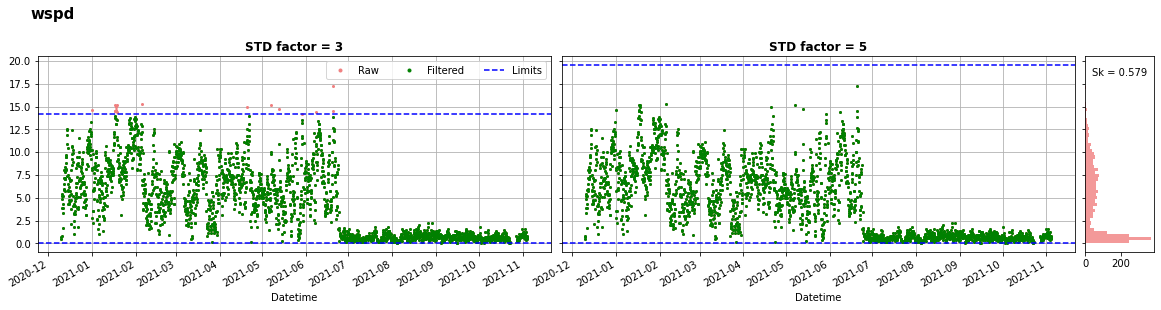

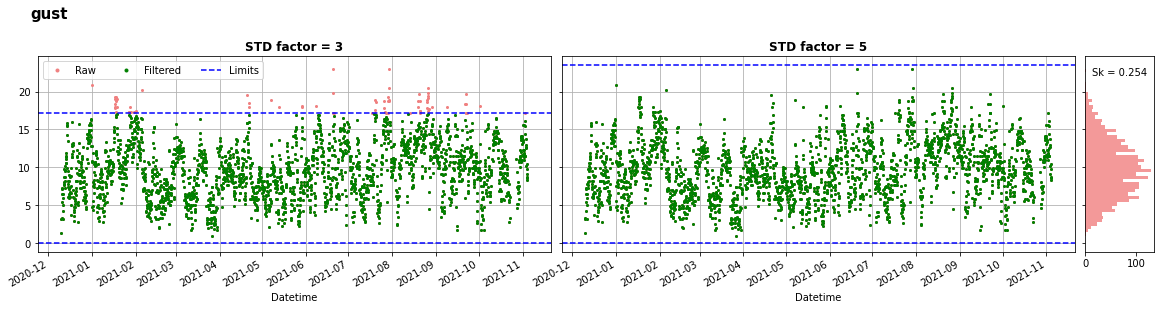

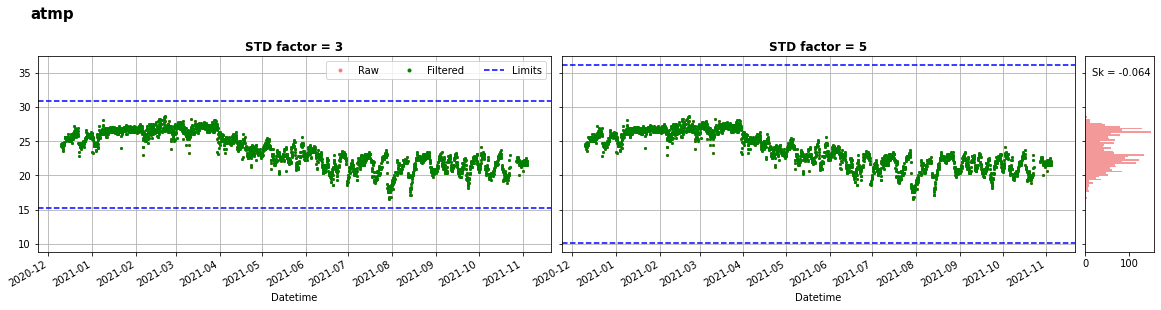

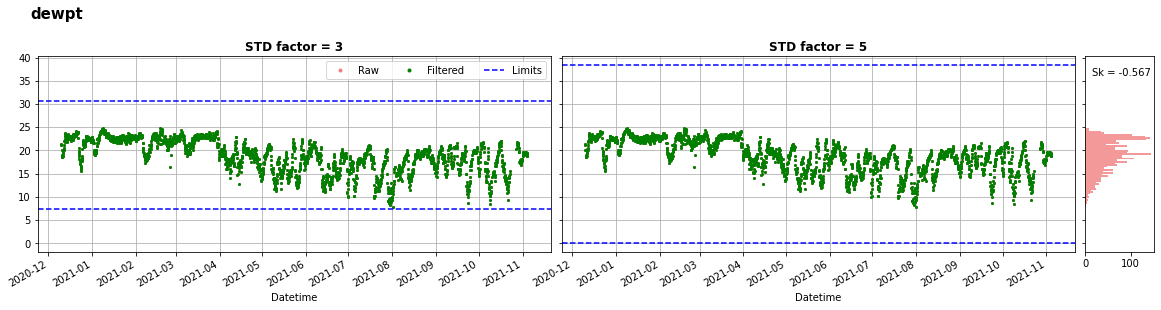

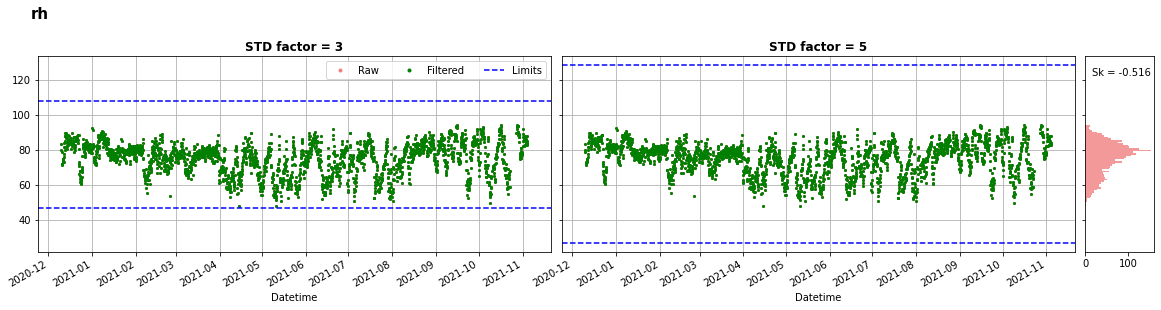

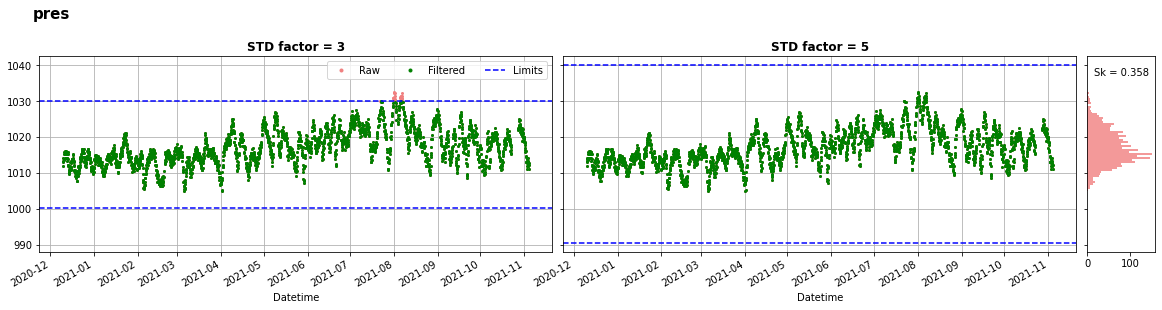

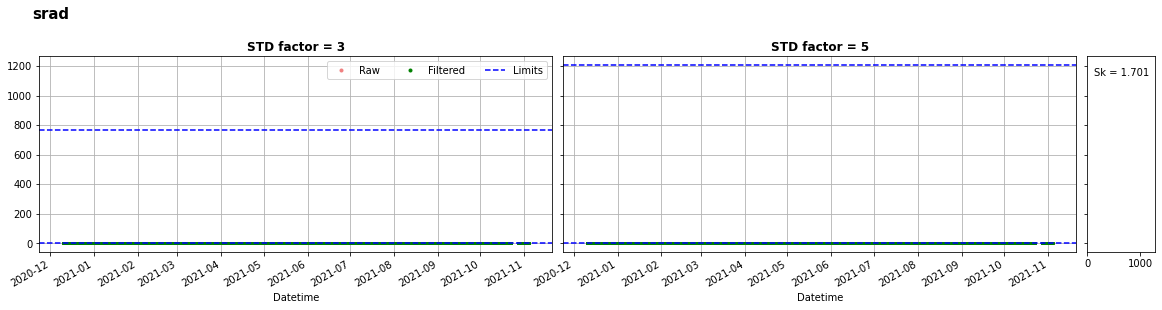

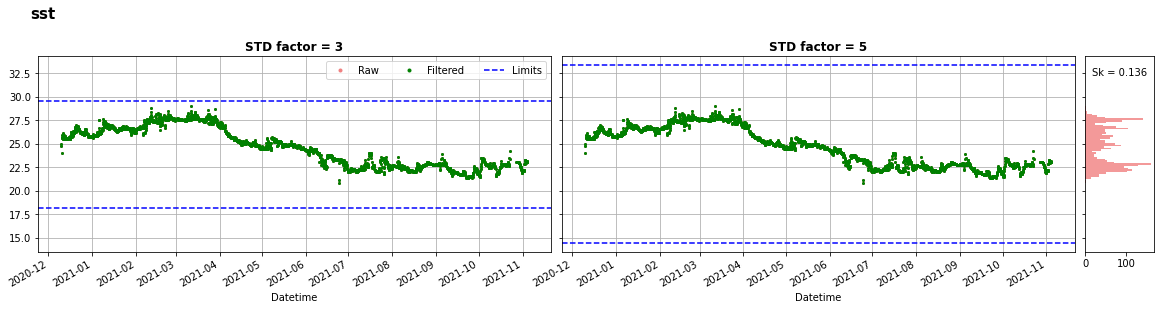

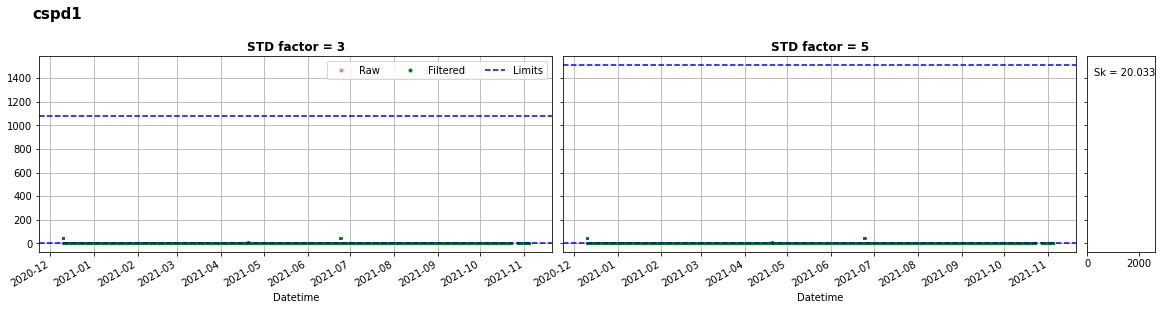

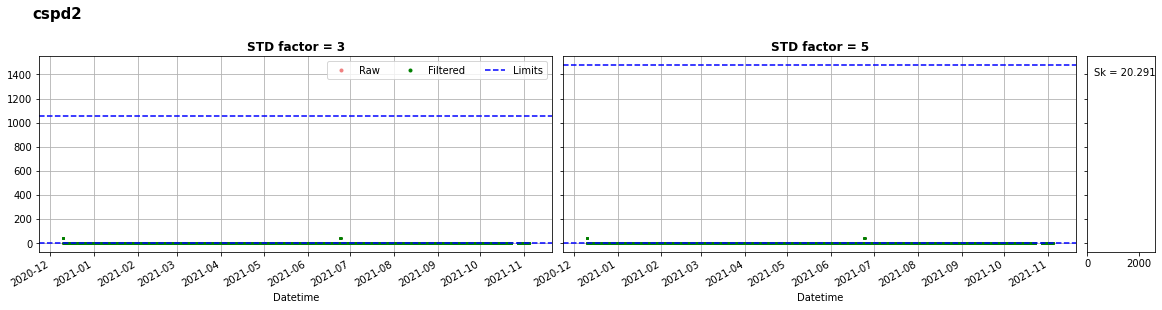

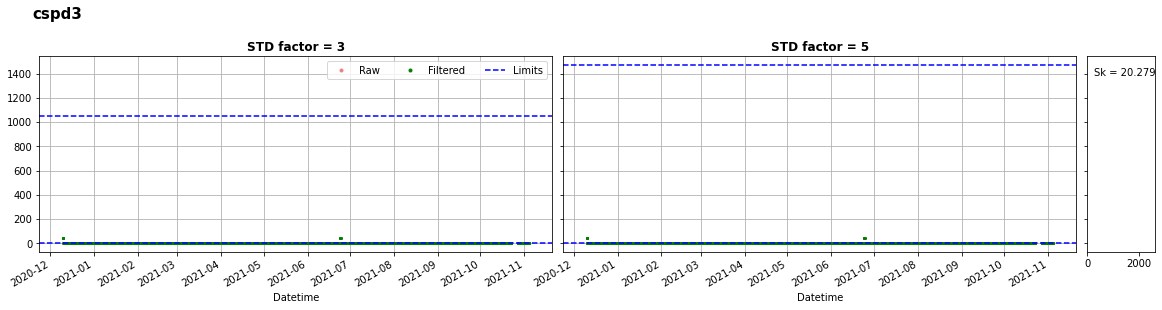

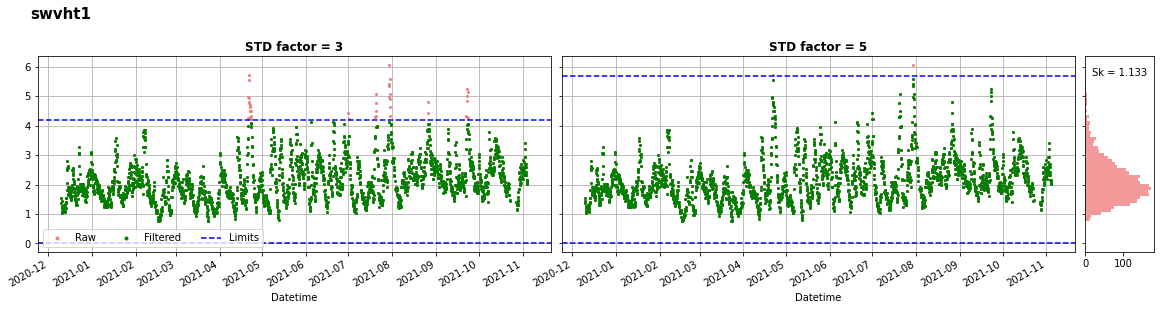

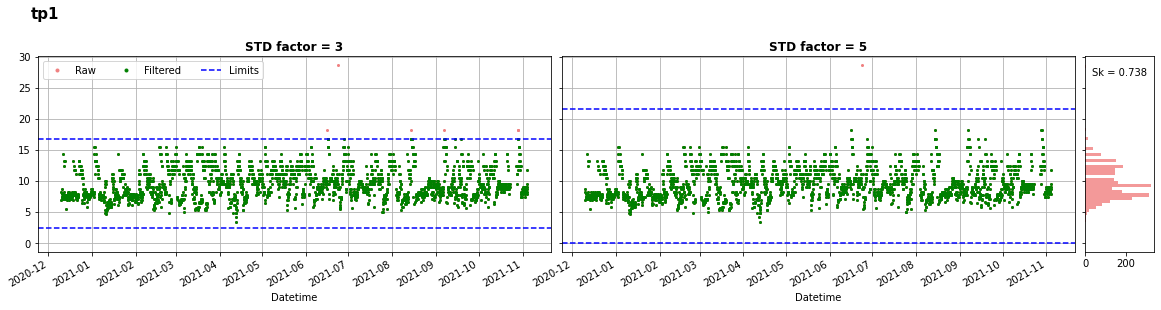

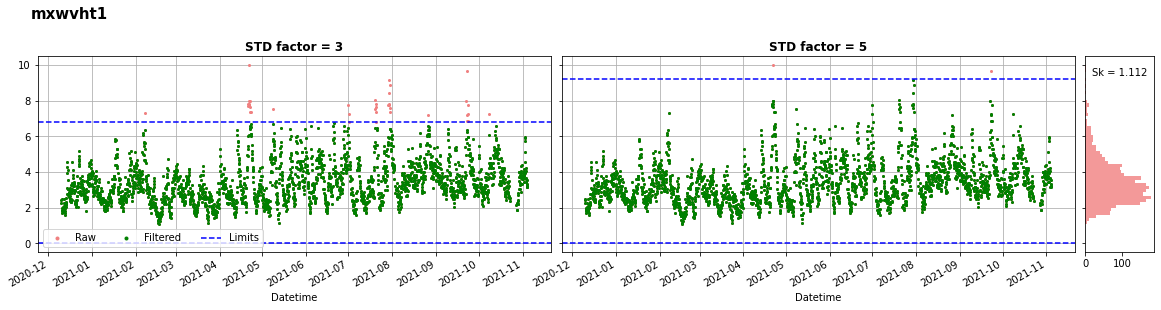

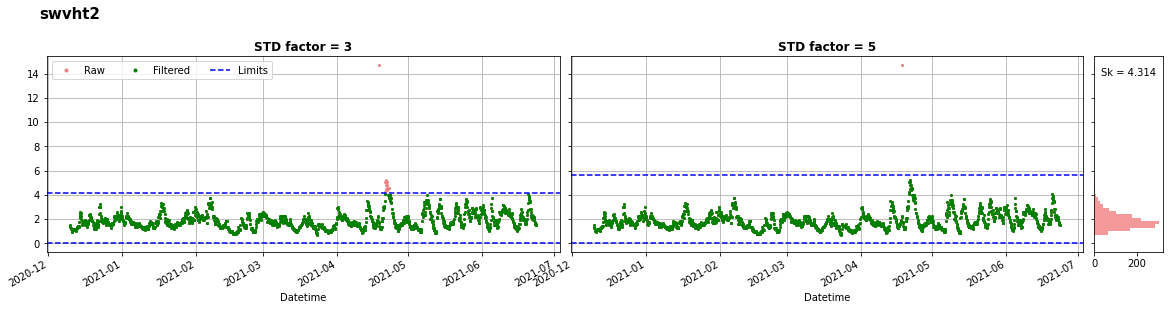

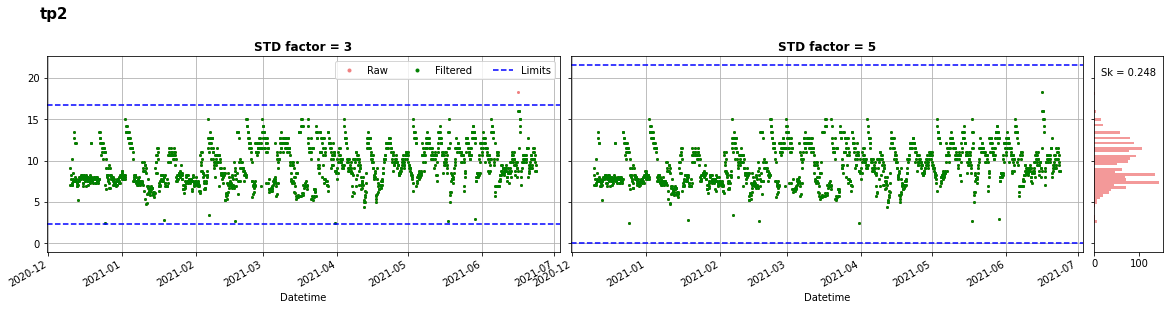

In [113]:
bmosantos_notdir = bmosantos.drop(columns=bmosantos.filter(regex='dir|head|spread').columns)

manual_limits = [santos_bmosantos_lims_1, santos_bmosantos_lims_2]

for param in bmosantos_notdir:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=bmosantos,
                    limits=bmosantos_lims,
                    manual_limits=manual_limits,
                    buoy='bmo_santos',
                    parameter=param)
    plt.show()

## Cabofrio filtering with Santos limits

In [114]:
# cabofrio data
cabofrio_raw = buoys_df_raw.loc['cabofrio']

# Limits from pnboia_limits_tests.py
cabofrio_lims = pnboia_limits_tests.cabofrio

# filter data with
cabofrio = filter_data(data=buoys_df_raw,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    mis_value_check=True,
                    range_check=True,
                    range_check_climate=False,
                    t_continuity_check=False)

mis_value_check done.
range_check done.


In [115]:
# Generated lims
cabofrio_out_lims_df_1 = gen_outlier_lim(cabofrio_raw,buoy_name='cabofrio',std_factor=3)

# Generate lims dict
cabofrio_out_lims_dict_1 = manual_outlier_lims('cabofrio',cabofrio_out_lims_df_1)

# filter data with
cabofrio1 = filter_data(data=buoys_df_raw,
                    buoy='cabofrio',
                    limits=cabofrio_lims,
                    mis_value_check=True,
                    range_check=True,
                    t_continuity_check=False,
                    range_check_climate_limits=santos_out_lims_dict_2)

mis_value_check done.
range_check done.
range_check_climate done.


In [116]:
cabofrio_out_lims_df_1

,mean,std,lower_lim,upper_lim
param,,,,
wspd1,4.363873,3.172773,0.000000,13.882192
gust1,4.981330,3.592320,0.000000,15.758290
wdir1,149.094216,90.907115,0.000000,421.815560
atmp,21.189707,8.099843,0.000000,45.489236
rh,80.609537,37.170415,0.000000,192.120782
dewpt,17.094976,17.117607,0.000000,68.447797
pres,1006.469023,45.912379,868.731886,1144.206160
sst,22.582836,5.649252,5.635079,39.530592
bhead,188.179894,95.824438,0.000000,475.653207


In [117]:
santos_out_lims_dict_2

{'wspd1': [0.0, 28.942075169935364],
 'gust1': [0.0, 48.24706074921885],
 'wdir1': [0.0, 613.6784026117091],
 'wspd2': [0.0, 19.525024371639578],
 'gust2': [0.0, 23.447787196598238],
 'wdir2': [0.0, 604.2016537417239],
 'atmp': [10.048261297154388, 36.12778181574294],
 'rh': [26.802515976424075, 128.5099671701657],
 'dewpt': [0.0, 38.316182293775704],
 'pres': [990.4469120567718, 1040.0182026673788],
 'sst': [14.407012248755152, 33.35756897027654],
 'bhead': [0.0, 572.3257925376885],
 'srad': [0.0, 1204.2125988909852],
 'cspd1': [0.0, 1508.2547010190506],
 'cdir1': [0.0, 464.77522847883205],
 'cspd2': [0.0, 1475.2701776159083],
 'cdir2': [0.0, 460.52057713035026],
 'cspd3': [0.0, 1469.6954743600427],
 'cdir3': [0.0, 458.05584384525696],
 'swvht': [0.0, 5.678118659929352],
 'mxwvht': [0.0, 9.19976551269172],
 'tp': [0.0, 21.543866208177306],
 'wvdir': [0.0, 370.78463824520395],
 'wvspread': [5.778061740560389, 69.72187407583561]}

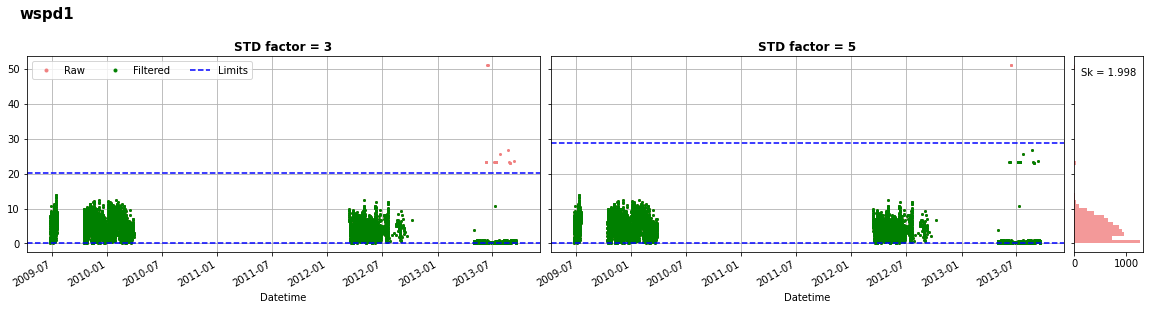

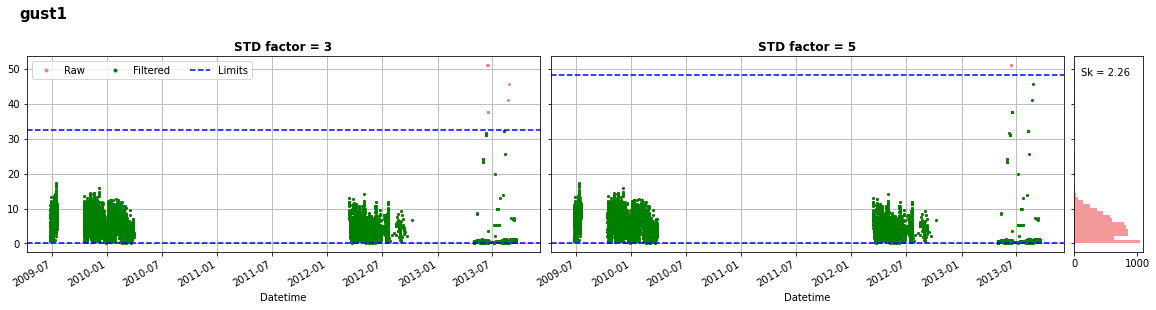

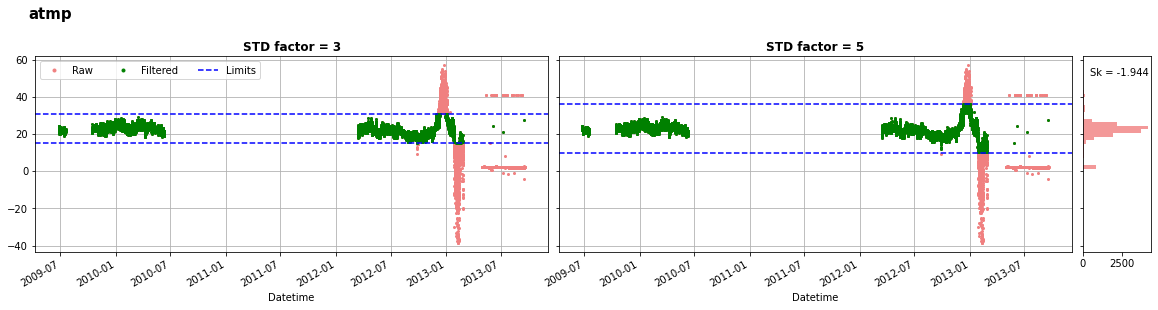

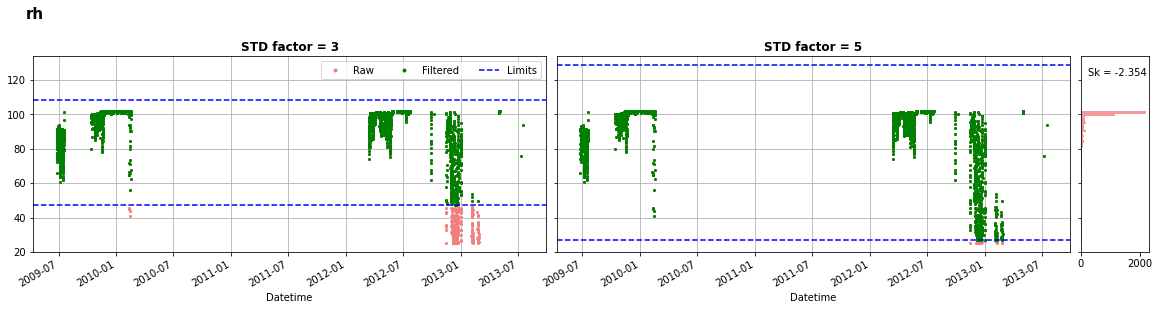

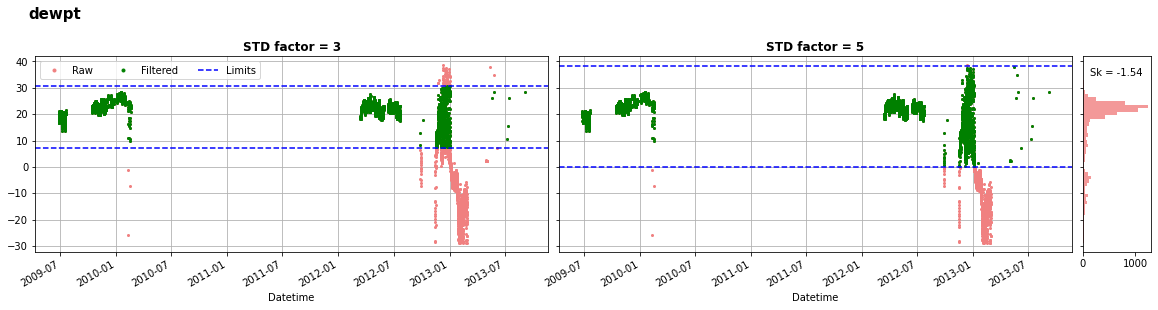

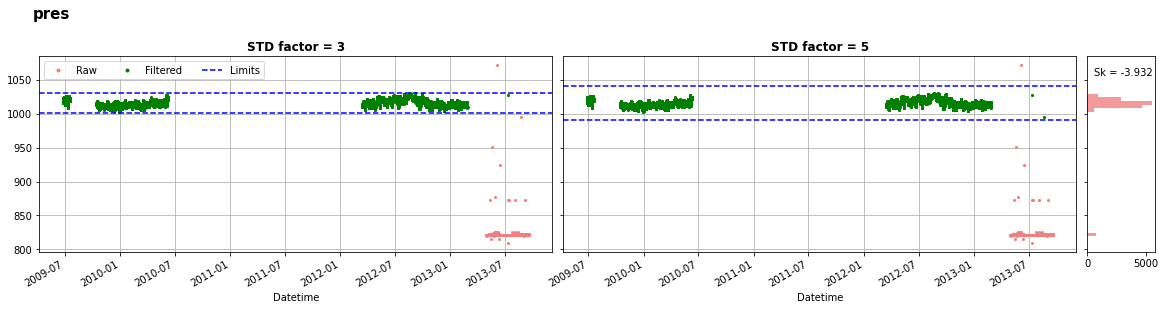

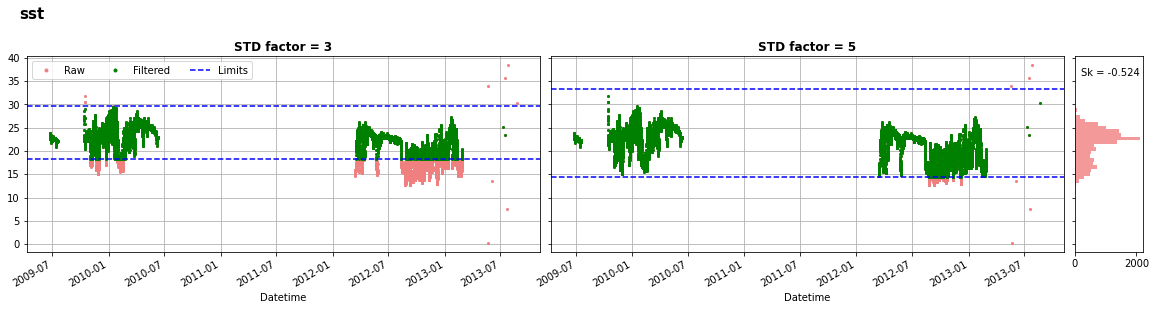

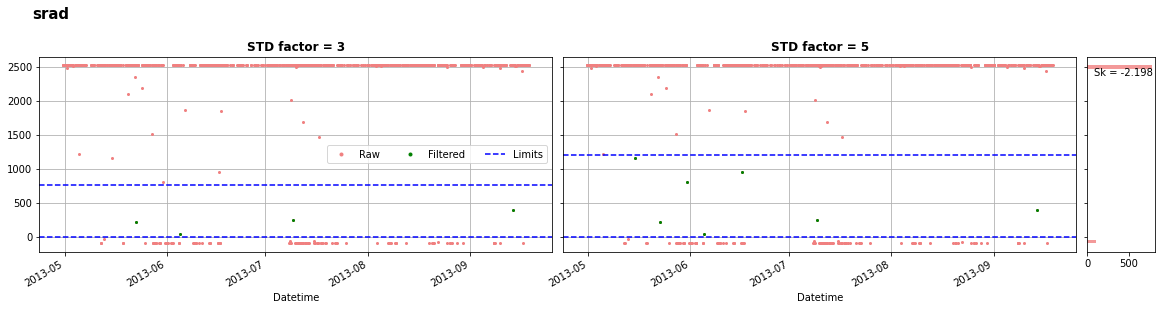

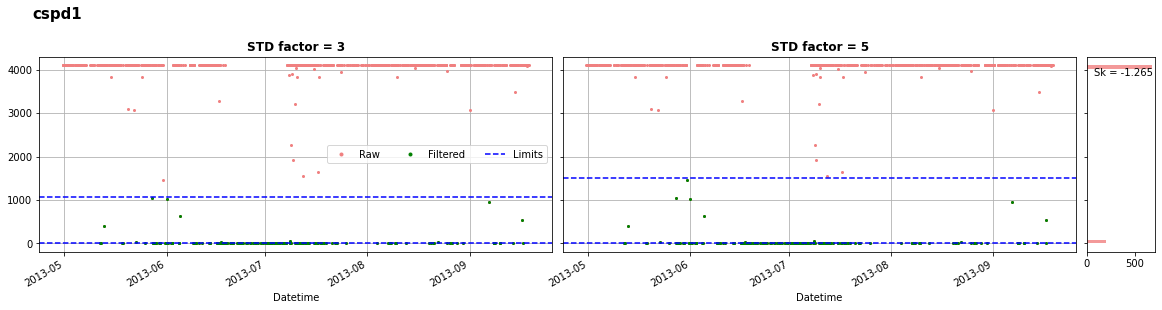

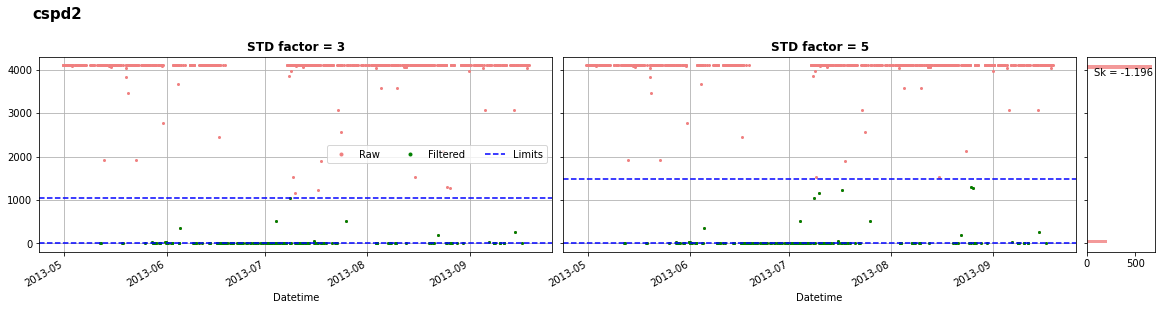

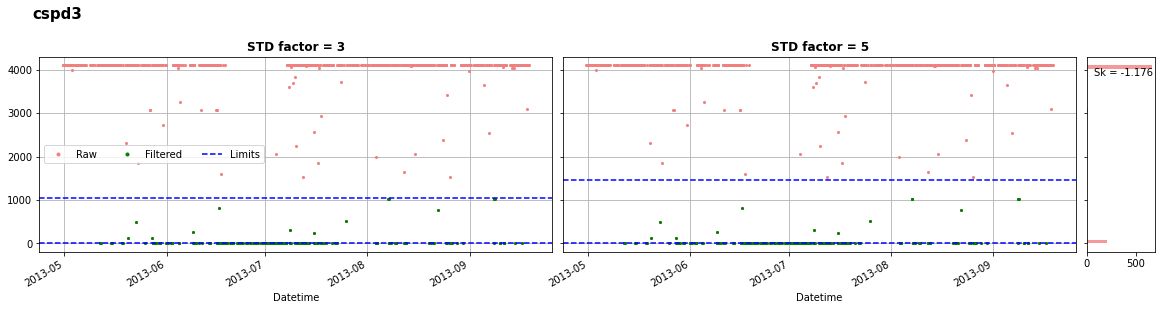

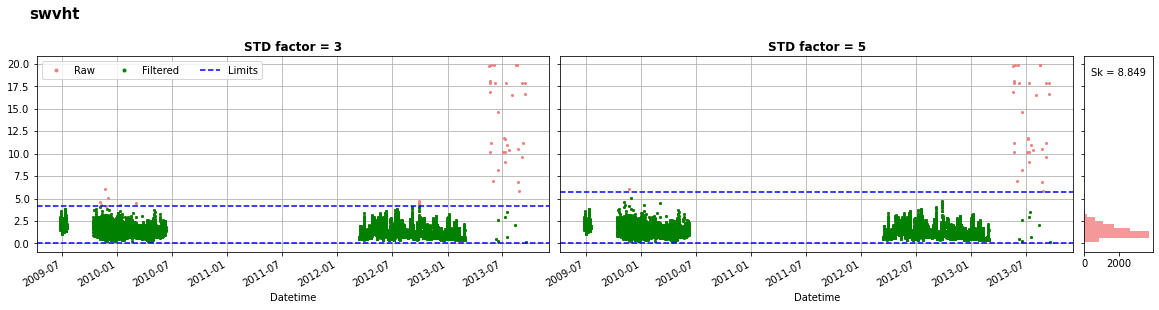

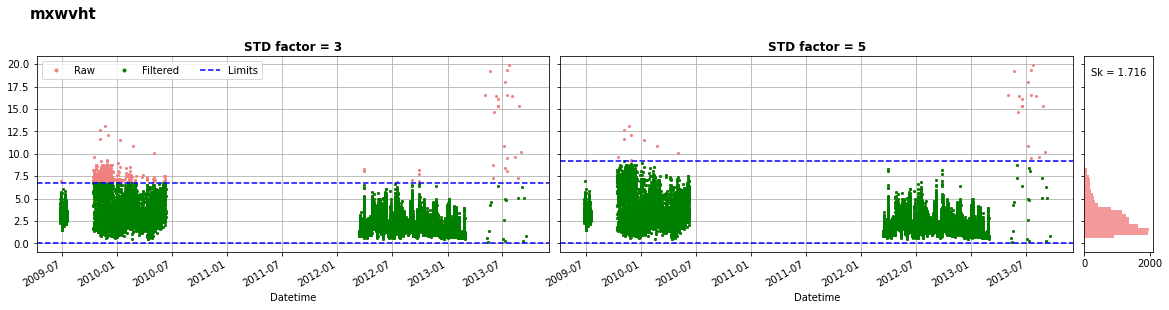

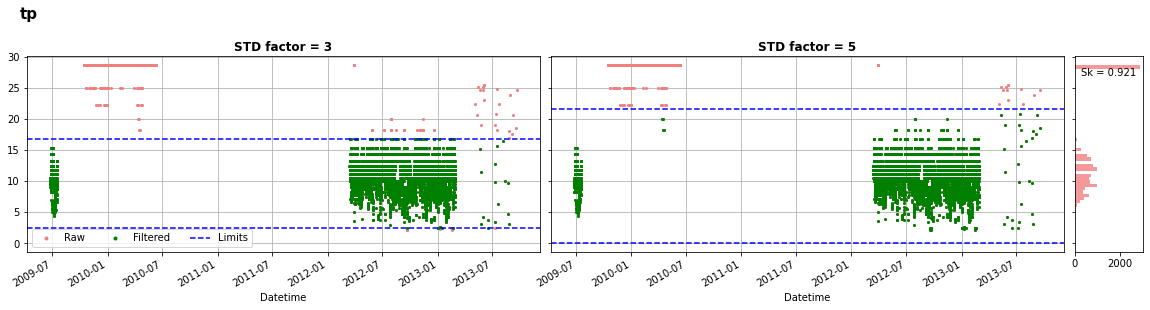

In [118]:
cabofrio_notdir = cabofrio.drop(columns=cabofrio.filter(regex='dir|head|spread').columns)
cabofrio_notdir = cabofrio_notdir.drop(columns=['wspd2','gust2'])
parameters = cabofrio_notdir.columns[1:]

manual_limits = [santos_out_lims_dict_1, santos_out_lims_dict_2]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=cabofrio,
                    limits=cabofrio_lims,
                    manual_limits=manual_limits,
                    buoy='cabofrio',
                    parameter=param)
    plt.show()